<a href="https://colab.research.google.com/github/sinman96/Data-Science-Projects/blob/main/CornersChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [682]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

**bold text**

In [683]:
df_train = pd.read_csv('train.csv')

In [684]:
df_train.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners
0,2826,793,02/04/2005,410,908,2.0,0.0,15,1
1,2827,793,02/04/2005,338,597,3.0,2.0,3,6
2,2828,793,02/04/2005,1364,246,2.0,3.0,13,2
3,2829,793,02/04/2005,1088,1397,1.0,0.0,2,5
4,2830,793,02/04/2005,830,1412,2.0,3.0,3,6


In [685]:
len(df_train)

23830

In [686]:
df_train.nunique()

MatchId         23830
LeagueId           13
Date             1348
HomeTeamId        332
AwayTeamId        333
Home_Goals         10
Away_Goals          9
Home_Corners       22
Away_Corners       20
dtype: int64

**From this, we can assume that MatchId is irrelevant to predicting corners as it represents an index for the ID of each match.**

In [687]:
df_train['Home_Corners'].describe()

count    23830.000000
mean         5.726060
std          2.844714
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         21.000000
Name: Home_Corners, dtype: float64

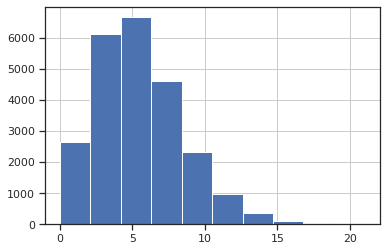

In [688]:
df_train['Home_Corners'].hist()

In [689]:
df_train['Away_Corners'].describe()

count    23830.000000
mean         4.493412
std          2.505376
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         19.000000
Name: Away_Corners, dtype: float64

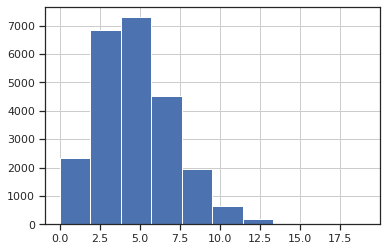

In [690]:
df_train['Away_Corners'].hist()

In [691]:
df_train['Total_Corners'] = df_train['Home_Corners'] + df_train['Away_Corners']

In [692]:
df_train['Total_Corners'].describe()

count    23830.000000
mean        10.219471
std          3.451955
min          0.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         25.000000
Name: Total_Corners, dtype: float64

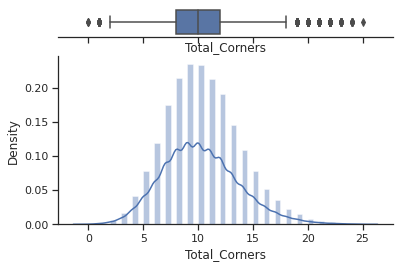

In [694]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="ticks")
x = df_train['Total_Corners']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [695]:
y_train = df_train['Total_Corners'].values

In [696]:
df_train.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Total_Corners
0,2826,793,02/04/2005,410,908,2.0,0.0,15,1,16
1,2827,793,02/04/2005,338,597,3.0,2.0,3,6,9
2,2828,793,02/04/2005,1364,246,2.0,3.0,13,2,15
3,2829,793,02/04/2005,1088,1397,1.0,0.0,2,5,7
4,2830,793,02/04/2005,830,1412,2.0,3.0,3,6,9


In [697]:
df_test = pd.read_csv('test.csv')

In [698]:
df_test.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Line,Over,Under,Unnamed: 8,P(Under),P(At),P(Over),Bet (U/O),Stake
0,1,741,01/04/2011,342,694,9.5,1.790,1.80,NaN,NaN,NaN,NaN,NaN,NaN
1,2,741,01/04/2011,1424,270,11.5,1.920,2.00,NaN,NaN,NaN,NaN,NaN,NaN
2,3,729,01/04/2011,691,1137,10.5,1.970,1.87,NaN,NaN,NaN,NaN,NaN,NaN
3,4,729,01/04/2011,787,808,11.0,2.075,1.77,NaN,NaN,NaN,NaN,NaN,NaN
4,5,741,01/04/2011,784,1117,12.0,2.020,1.86,NaN,NaN,NaN,NaN,NaN,NaN


In [699]:
df_test.nunique()

MatchId       341
LeagueId        7
Date           31
HomeTeamId    129
AwayTeamId    134
Line            7
Over           75
Under          96
Unnamed: 8      0
P(Under)        0
P(At)           0
P(Over)         0
Bet (U/O)       0
Stake           0
dtype: int64

In [700]:
df_test = df_test.drop(['Unnamed: 8'], axis = 1)

**The test data set doesn't have goals, so I will not use them in the training predictions and also not use the dates**

In [701]:
X_train = df_train.drop(['Date'], axis = 1).iloc[:, 1:4].values

In [702]:
X_train

array([[ 793,  410,  908],
       [ 793,  338,  597],
       [ 793, 1364,  246],
       ...,
       [ 800, 4704, 4705],
       [ 800, 2113,  250],
       [ 800,  907, 1827]])

In [703]:
y_train = df_train['Total_Corners'].values

In [704]:
y_train

array([16,  9, 15, ...,  8, 10, 10])

In [705]:
X_test = df_test.drop(['Date'], axis = 1).iloc[:, 1:4].values

In [706]:
X_test

array([[ 741,  342,  694],
       [ 741, 1424,  270],
       [ 729,  691, 1137],
       ...,
       [ 801, 1223,  771],
       [ 801,  238,  570],
       [ 776,  412, 1089]])

**Using XGBoost regression to predict the total corners for test set**

In [707]:
from xgboost.sklearn import XGBRegressor
regressor = XGBRegressor(silent = True)
regressor.fit(X_train, y_train)
# Get importance of features
regressor.feature_importances_ 

array([0.65253305, 0.17722033, 0.17024665], dtype=float32)

**Each feature is important in predicting corners so I won't remove any of them.**

In [708]:
y_pred = regressor.predict(X_test)

In [709]:
df_test['Total_Predicted_Corners'] = pd.DataFrame(data = y_pred)

In [710]:
df_test.columns

Index(['MatchId', 'LeagueId', 'Date', 'HomeTeamId', 'AwayTeamId', 'Line',
       'Over', 'Under', 'P(Under)', 'P(At)', 'P(Over)', 'Bet (U/O)', 'Stake',
       'Total_Predicted_Corners'],
      dtype='object')

In [711]:
df_test = df_test[['MatchId', 'LeagueId', 'Date', 'HomeTeamId', 'AwayTeamId', 'Total_Predicted_Corners', 'Line',
       'Over', 'Under', 'P(Under)', 'P(At)', 'P(Over)', 'Bet (U/O)', 'Stake']]

In [712]:
df_test.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Total_Predicted_Corners,Line,Over,Under,P(Under),P(At),P(Over),Bet (U/O),Stake
0,1,741,01/04/2011,342,694,10.180111,9.5,1.790,1.80,NaN,NaN,NaN,NaN,NaN
1,2,741,01/04/2011,1424,270,10.700562,11.5,1.920,2.00,NaN,NaN,NaN,NaN,NaN
2,3,729,01/04/2011,691,1137,10.849359,10.5,1.970,1.87,NaN,NaN,NaN,NaN,NaN
3,4,729,01/04/2011,787,808,10.799646,11.0,2.075,1.77,NaN,NaN,NaN,NaN,NaN
4,5,741,01/04/2011,784,1117,10.482979,12.0,2.020,1.86,NaN,NaN,NaN,NaN,NaN


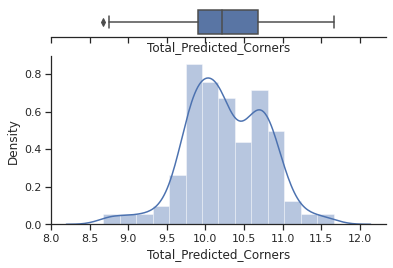

In [713]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="ticks")
x = df_test['Total_Predicted_Corners']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [714]:
stats.ttest_ind(df_train['Total_Corners'], df_test['Total_Predicted_Corners'])

Ttest_indResult(statistic=-0.24956897879847673, pvalue=0.802922811822249)

**As pvalue > 0.05, we can assume Total Corners in test follows the same distribution as Total Corners in the train, as they have the same mean to this significance. As the data follows a discrete distribution with a constant mean and bell curve shape I will assume it's Poisson distributed.**

In [715]:
df_test['Total_Predicted_Corners'].mean()

10.266132

In [716]:
df_train['Total_Corners'].mean()

10.21947125472094

In [717]:
mu = df_train['Total_Corners'].mean()
from scipy.stats import poisson
from math import floor   
df_test['P(At)'] = np.select([(2*df_test['Line'] % 2 != 0), (2*df_test['Line'] % 2 == 0)],
[0, poisson.pmf(df_test['Line'], mu)])
df_test['P(Over)'] = 1 - poisson.cdf(df_test['Line'], mu)
df_test['P(Under)'] = poisson.cdf(df_test['Line'], mu) - df_test['P(At)']
       

In [718]:
df_test.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Total_Predicted_Corners,Line,Over,Under,P(Under),P(At),P(Over),Bet (U/O),Stake
0,1,741,01/04/2011,342,694,10.180111,9.5,1.790,1.80,0.430790,0.000000,0.569210,NaN,NaN
1,2,741,01/04/2011,1424,270,10.700562,11.5,1.920,2.00,0.671560,0.000000,0.328440,NaN,NaN
2,3,729,01/04/2011,691,1137,10.849359,10.5,1.970,1.87,0.555603,0.000000,0.444397,NaN,NaN
3,4,729,01/04/2011,787,808,10.799646,11.0,2.075,1.77,0.555603,0.115957,0.328440,NaN,NaN
4,5,741,01/04/2011,784,1117,10.482979,12.0,2.020,1.86,0.671560,0.098752,0.229688,NaN,NaN


In [719]:
df_test['Line'].value_counts()

10.0    80
10.5    77
11.0    76
9.5     60
11.5    27
12.0    14
9.0      7
Name: Line, dtype: int64

**As there are no quarter lines we only need to focus filtering half or full line below.**

In [720]:
"""Finding expected values of different bets depending if they're based of half lines or not.
If it's a half line your stake cannot be refunded to you when you get the exact number of corners.
When it's a half line you just need to add df_test['P(At)'] on both conditions, so it's the same comparison
for both."""
df_test['Bet (U/O)'] = np.select([((df_test['Over'] - 1)*df_test['P(Over)'] - df_test['P(Under)'] >  
(df_test['Under'] - 1)*df_test['P(Under)'] - df_test['P(Over)']),((df_test['Under'] - 1)*df_test['P(Under)'] - df_test['P(Over)'] >  
(df_test['Over'] - 1)*df_test['P(Over)'] - df_test['P(Under)'])],['O','U']) 

In [721]:
df_test.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Total_Predicted_Corners,Line,Over,Under,P(Under),P(At),P(Over),Bet (U/O),Stake
0,1,741,01/04/2011,342,694,10.180111,9.5,1.790,1.80,0.430790,0.000000,0.569210,O,NaN
1,2,741,01/04/2011,1424,270,10.700562,11.5,1.920,2.00,0.671560,0.000000,0.328440,U,NaN
2,3,729,01/04/2011,691,1137,10.849359,10.5,1.970,1.87,0.555603,0.000000,0.444397,U,NaN
3,4,729,01/04/2011,787,808,10.799646,11.0,2.075,1.77,0.555603,0.115957,0.328440,U,NaN
4,5,741,01/04/2011,784,1117,10.482979,12.0,2.020,1.86,0.671560,0.098752,0.229688,U,NaN


**Creating a new field to measure expected profit proportionally for each bet**

In [722]:
df_test["E(Bet(U/O))"] = np.nan
df_test['E(Bet(U/O))'] = np.select([((df_test['Bet (U/O)'] == "O") & (df_test['P(At)'] != 0)),((df_test['Bet (U/O)'] == "U") & (df_test['P(At)'] != 0)),
((df_test['Bet (U/O)'] == "O") & (df_test['P(At)'] == 0)),((df_test['Bet (U/O)'] == "U") & (df_test['P(At)'] == 0))],
[(df_test['Over'] - 1)*df_test['P(Over)'] - df_test['P(Under)'],(df_test['Under'] - 1)*df_test['P(Under)'] - df_test['P(Over)'],
(df_test['Over'] - 1)*df_test['P(Over)'] + df_test['P(At)'] - df_test['P(Under)'],(df_test['Under'] - 1)*df_test['P(Under)'] + df_test['P(At)'] - df_test['P(Over)']])

In [723]:
df_test.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Total_Predicted_Corners,Line,Over,Under,P(Under),P(At),P(Over),Bet (U/O),Stake,E(Bet(U/O))
0,1,741,01/04/2011,342,694,10.180111,9.5,1.790,1.80,0.430790,0.000000,0.569210,O,NaN,0.018886
1,2,741,01/04/2011,1424,270,10.700562,11.5,1.920,2.00,0.671560,0.000000,0.328440,U,NaN,0.343121
2,3,729,01/04/2011,691,1137,10.849359,10.5,1.970,1.87,0.555603,0.000000,0.444397,U,NaN,0.038979
3,4,729,01/04/2011,787,808,10.799646,11.0,2.075,1.77,0.555603,0.115957,0.328440,U,NaN,0.099375
4,5,741,01/04/2011,784,1117,10.482979,12.0,2.020,1.86,0.671560,0.098752,0.229688,U,NaN,0.347854


In [724]:
df_test['E(Bet(U/O))'].describe()

count    341.000000
mean       0.119316
std        0.105946
min       -0.048609
25%        0.032271
50%        0.099375
75%        0.197161
max        0.386133
Name: E(Bet(U/O)), dtype: float64

**Where E(Bet(U/O) is no greater than zero there is no point in placing a bet so I'll call this entries N, indicating to place no bet**

**Using the gambling formula in Kelly's Criterion. E(B(U/O)) represents the proprtion gained per unit of the bet. The optimal stake as a proportion of the bankroll is represented by this formula: f* = p - (1-p)/E(B(U/O)). Similarly if E(B(U/O) is not greater than 0 return 0** 

In [725]:
df_test['Stake'] = np.select([(df_test['E(Bet(U/O))'] <= 0), (df_test['Bet (U/O)'] == "O"), (df_test['Bet (U/O)'] == "U")]
,[0, df_test['P(Over)'] - (1 - df_test['P(Over)'])/df_test['Over'], df_test['P(Under)'] - (1 - df_test['P(Under)'])/df_test['Under']])

In [726]:
df_test.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Total_Predicted_Corners,Line,Over,Under,P(Under),P(At),P(Over),Bet (U/O),Stake,E(Bet(U/O))
0,1,741,01/04/2011,342,694,10.180111,9.5,1.790,1.80,0.430790,0.000000,0.569210,O,0.328545,0.018886
1,2,741,01/04/2011,1424,270,10.700562,11.5,1.920,2.00,0.671560,0.000000,0.328440,U,0.507341,0.343121
2,3,729,01/04/2011,691,1137,10.849359,10.5,1.970,1.87,0.555603,0.000000,0.444397,U,0.317958,0.038979
3,4,729,01/04/2011,787,808,10.799646,11.0,2.075,1.77,0.555603,0.115957,0.328440,U,0.304532,0.099375
4,5,741,01/04/2011,784,1117,10.482979,12.0,2.020,1.86,0.671560,0.098752,0.229688,U,0.494980,0.347854


**If E(Bet(U/O)) is not positive the bet is either losing or gaining nothing in the long run so I will encode these non bets as N.**

In [727]:
df_test['Bet (U/O)'] = np.where(df_test['E(Bet(U/O))'] > 0, df_test['Bet (U/O)'], "N")

In [728]:
df_test['Bet (U/O)'].value_counts()

U    189
O    102
N     50
Name: Bet (U/O), dtype: int64

In [729]:
df_test = df_test.drop(['E(Bet(U/O))'], axis = 1)

In [730]:
df_test.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Total_Predicted_Corners,Line,Over,Under,P(Under),P(At),P(Over),Bet (U/O),Stake
0,1,741,01/04/2011,342,694,10.180111,9.5,1.790,1.80,0.430790,0.000000,0.569210,O,0.328545
1,2,741,01/04/2011,1424,270,10.700562,11.5,1.920,2.00,0.671560,0.000000,0.328440,U,0.507341
2,3,729,01/04/2011,691,1137,10.849359,10.5,1.970,1.87,0.555603,0.000000,0.444397,U,0.317958
3,4,729,01/04/2011,787,808,10.799646,11.0,2.075,1.77,0.555603,0.115957,0.328440,U,0.304532
4,5,741,01/04/2011,784,1117,10.482979,12.0,2.020,1.86,0.671560,0.098752,0.229688,U,0.494980
